<a href="https://colab.research.google.com/github/sgsoul/mwtda/blob/main/MWTDA_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1 (numpy + matplotlib)

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
* На вход программа должна принимать 2 строки (т.е. должен быть реализован ввод с клавиатуры). Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.
* Систему уравнений необходимо решить "матричным" способом. Предусмотрите случаи, когда решения есть, решений нет, решений бесконечно много. Выведите ответ. Покажите решение на графике. Если решения есть, постройте график и точкой отметьте решение (если оно одно, например, функцией [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)). ГРАФИК СТРОИТСЯ ВО ВСЕХ ТРЕХ РАССМАТРИВАЕМЫХ СЛУЧАЯХ.


введите действительные числа через пробел для первого уравнения: 0 0 6
введите действительные числа через пробел для второго уравнения: 0 0 85


бесконечное множество решений


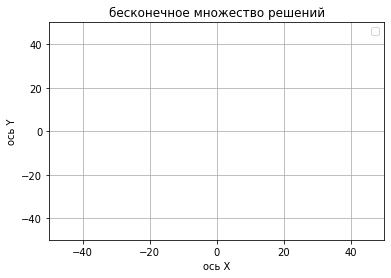

In [31]:
import numpy as np
import matplotlib.pyplot as plt

a11, a12, b1 = list(map(float, input("\nвведите действительные числа через пробел для первого уравнения: ").split()))
a21, a22, b2 = list(map(float, input("введите действительные числа через пробел для второго уравнения: ").split()))

#формируем матрицы и определители
#V1 = np.array([b1, b2]) #матрица коэф-ов b1, b2
main_det = np.linalg.det(np.array([[a11, a12], [a21, a22]])) #определитель, составленный из коэффициентов при переменных
det_x = np.linalg.det(np.array([[b1, a12], [b2, a22]]))   #вспомогательный определитель по х
det_y = np.linalg.det(np.array([[a11, b1], [a21, b2]]))   #вспомогательный определитель по у

#формируем координатные оси
fig, axes = plt.subplots()
axes.set_xlabel('ось Х')
axes.set_ylabel('ось Y')
x = np.arange(-100, 100)
plt.grid(True)

#выражаем функции для построения прямых уравнений
if a12 > 0:
    y1 = lambda x: (b1-a11*x)/a12
if a12 < 0:
    y1 = lambda x: (a11*x-b1)/(-a12)
else: 
    lambda x: b1/a11
if a22 > 0:
    y2 = lambda x: (b2-a21*x)/a22
if a22 < 0:
    y2 = lambda x: (a21*x-b2)/(-a22)
else:
    lambda x: b2/a21

#решаем слау
if main_det != 0:
    X = det_x/main_det
    Y = det_y/main_det
    print("\nединственное решение: (", X, ';', Y, ')')
    plt.title('единственное решение')
    plt.axis([0,X*2,0,Y*2])
    plt.scatter(X, Y)
    
else:
    plt.axis([-50,50,-50,50])
    if det_x == 0 and det_y == 0:
        print("\nбесконечное множество решений")
        plt.title('бесконечное множество решений')
    else:
        print("\nрешеший нет")
        plt.title('решеший нет')

#строим прямые уравнений
if a12 != 0 and a22!=0:
    axes.plot(x, y1(x), label='a11*x + a12*y = b1', linewidth = 3, color='dodgerblue')
    axes.plot(x, y2(x), label='a21*x + a22*y = b2', linestyle='dashdot', color='navy')
if a12 == 0 and a22 !=0:
    axes.plot(x, label='a11*x = b1', linewidth = 3, color='dodgerblue')
    axes.plot(x, y2(x), label='a21*x + a22*y = b2', linestyle='dashdot', color='navy')
if a12 != 0 and a22 ==0:
    axes.plot(x, y1(x), label='a11*x + a12*y = b1', linewidth = 3, color='dodgerblue')
    axes.plot(x, label='a21*x = b2', linestyle='dashdot', color='navy')
    
#строим легенду и выводим грфик
axes.legend()
plt.show()

# Задание 2 (pytorch + matplotlib)

Пусть $f(x) = \sin(x) * x$. Постройте график $f(x)$ и $\frac{df(x)}{dx}$, для расчета производных воспользуйтесь методом `backward()` и matplotlib для построения графиков.

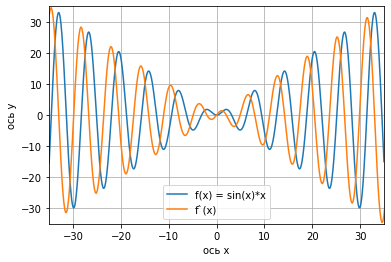

In [40]:
import torch
import matplotlib.pyplot as plt

fig, axes = plt.subplots()
axes.set_xlabel('ось x')
axes.set_ylabel('ось y')

plt.axis([-35,35,-35,35])
x = np.arange(-100, 100, 0.01)
y = lambda x: np.sin(x) * x
plt.plot(x, y(x), label='f(x) = sin(x)*x')
x = torch.linspace(-50, 50, 500, requires_grad=True)
y = torch.sum(torch.sin(x)*x)
y.backward()
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='f`(x)')
plt.grid(True)
plt.legend()
plt.show()